***
***
***

<br><h1>Apprentice Chef, Inc. Regression Analysis</h1><br>
<strong>Piya Thavornwong</strong><br>

***
***
***

<strong> Introduction </strong><br>
This is the analysis to get the insight from customer behavior that been with us for a year, which contributed for 90% of our total revenue. We can use machine learning to get the insights from data and use it to predict the revenue in the future.

<h2> Exploratory Data Analysis</h2><br>
Import libraries and load the 'Apprentice_Chef_Dataset.xlsx' into Python as apprentice

In [1]:
# importing libraries
import pandas                  as     pd
import numpy                   as     np
import matplotlib.pyplot       as     plt
import seaborn                 as     sns
import statsmodels.formula.api as     smf
import pandas                  as     pd 
from sklearn.model_selection   import train_test_split, cross_val_score 
import xgboost                 as     xgb
from sklearn.linear_model      import LinearRegression, Ridge

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)



<strong>Explore the data</strong>

See what is in the dataset by using .head() to see first 5 rows.


In [2]:
apprentice.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


<strong>Initial Hypothesis</strong>

From the data, I think that there are many variables that important to the revenue of customers.

- CONTACT_W_CUSTOMER_SERVICE: I think the more times people contact with the customer service, the more problems that they face when they order our food.
- LATE_DELIVERIES: I think that the customer that experience more late deliveries will get the bad experience and order less. According to the article from Mckinsey <a href="https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/the-changing-market-for-food-delivery">The changing market for food delivery</a>, time is a very critical factor for the food delivery service.
- PACKAGE_LOCKER and REFRIGERATED_LOCKER: I think that the customer that have package locker and refrigerated will order more meals from us because they have the place to store the order. According to this article <a href="https://www.usfoods.com/our-services/business-trends/2019-food-delivery-statistics.html">NEW STUDY SHOWS WHAT CONSUMERS CRAVE IN A FOOD DELIVERY SERVICE</a>, top complant from the customers is that the food is not fresh.


<strong>Check the missing data</strong>

First, we check if there is any missing data in each column by using .isnull()


In [3]:
# check the missing value
print(apprentice.isnull().sum())


REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

<strong>Flag and replace</strong>

'FAMILY_NAME' column contains 47 missing values.
Flag the missing data by creating a new column called 'm_FAMILY_NAME'

Then, replace the missing data in 'FAMILY_NAME' by putting 'No_fam_name' in the missing value

In [4]:
# Flag the missing value
for column in apprentice:

    # creating columns with 1s if missing and 0 if not
    if apprentice[column].isnull().astype(int).sum() > 0:
        
        apprentice['m_'+column] = apprentice[column].isnull().astype(int)
        

In [5]:
# replace the missing value
fill = 'No_fam_name'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(value = fill)



<strong>Check the data by using describe()</strong>

Take a look at some statistical information for each variables

In [6]:
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710,0.024152
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124,0.153561
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000,0.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000,1.000000


<strong>Descriptive Analysis</strong><br>

- There is a big gap between the 75% and 100% percentile in REVENUE, TOTAL_MEAL_ORDERED, AVG_TIME_PER_SITE_VISIT, CANCELLATION_BEFORE_NOON, WEEKLY_PLAN, LATE_DELIVERIES, AVG_PREP_VID_TIME, LARGEST_ORDER_SIZE, and TOTAL_PHOTO_VIEWED. We can explore what happen behind it further by using histogram.
<br>
- There is something wrong in the 'LARGEST_ORDER_SIZE' column. From the data dictionary, 'LARGEST_ORDER_SIZE' is the largest number of meals a customer has ordered in a single order. However, the minimum is 0.


Take a look at that data by filtering


In [7]:
# filter LARGEST_ORDER_SIZE = 0 to see the observation
apprentice[apprentice['LARGEST_ORDER_SIZE'] == 0]

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
1086,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,0,10,33.4,0,0,1,17,0,0



From the information in the case. There are 2 types of customer

- at least one purchase per month for a total of 11 of their first 12 months
- at least one purchase per quarter and at least 15 purchases throughout their first year

We can assume that the largest order size for this customer is 2 because this customer ordered only 14 meals and contact customer service 12 times. It means that this customer ordered every month.

We can put 2 instead of 0 because this customer has a very low number in revenue


In [8]:
# Replace 0 to 2 in 'LARGEST_ORDER_SIZE' column
apprentice['LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] == 0] = 2

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<strong> Determine the variable type</strong>

I decided to specify each variable in to types as follow<br>

<u>Continuous or interval variables</u><br>
REVENUE<br>
TOTAL_MEALS_ORDERED - Maybe Count?<br>
AVG_TIME_PER_SITE_VISIT<br>
FOLLOWED_RECOMMENDATIONS_PCT<br>
AVG_PREP_VID_TIME<br>
LARGEST_ORDER_SIZE<br>
MEDIAN_MEAL_RATING<br>
AVG_CLICKS_PER_VISIT<br>
MEALS_PER_WEEK<br>
CONTACT_PER_MEAL<br><br>


<u>Binary variables</u><br>
CROSS_SELL_SUCCESS<br>
MOBILE_NUMBER<br>
TASTES_AND_PREFERENCES<br>
PACKAGE_LOCKER<br>
REFRIGERATED_LOCKER<br><br>


<u>Count variables</u><br>
TOTAL_MEALS_ORDERED - Maybe Continuous?<br>
UNIQUE_MEALS_PURCH<br>
CONTACTS_W_CUSTOMER_SERVICE<br>
PRODUCT_CATEGORIES_VIEWED<br>
CANCELLATIONS_BEFORE_NOON<br>
CANCELLATIONS_AFTER_NOON<br>
PC_LOGINS<br>
MOBILE_LOGINS<br>
WEEKLY_PLAN<br>
EARLY_DELIVERIES<br>
LATE_DELIVERIES<br>
MASTER_CLASSES_ATTENDED<br>
TOTAL_PHOTOS_VIEWED<br>
TOTAL_CANCELLATIONS<br>
TOTAL_LOGINS<br><br>

<u>Categorical variables</u><br>
DOMAIN_TYPE<br><br>



<u>Discrete variable</u><br>
NAME<br>
EMAIL<br>
FIRST_NAME<br>
FAMILY_NAME<br>
EMAIL_DOMAIN<br><br>


<strong> Find the outliers by using histogram </strong>


Create a histogram of variables to see if there is any outliers in the data.

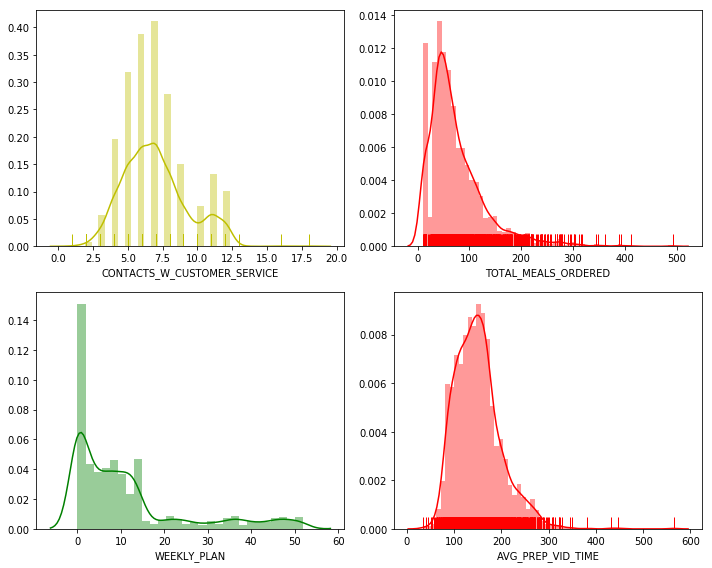

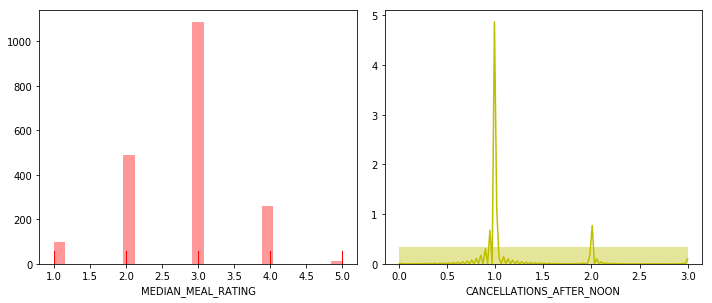

In [9]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'y',
             rug   = True)
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = True,
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################
plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################
########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             rug   = False,
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.tight_layout()
plt.show()



<strong> Flag the outliers </strong>

The graph above show some variables that I think it is important to treat some of the data as outliers.<br>

<u>TOTAL_MEALS_ORDERED</u>: The data separate from the distribution after 325<br>
<u>CONTACTS_W_CUSTOMER_SERVICE</u>: The data is going up again after 10<br>
<u>CANCELLATIONS_AFTER_NOON</u>: There is only few amount of people who cancel in after noon more than 1<br> 
<u>WEEKLY_PLAN</u>:  the data drop dramatically after 15<br>
<u>AVG_PREP_VID_TIME</u>: There is separate from the distribution after 400<br>
<u>MEDIAN_MEAL_RATING</u>: There is only few amount of people who gave 5 in average meal rating<br>


Create new columns by flagging the outliers in each variables


In [10]:
# Set the outlier 
TOTAL_MEALS_ORDERED_hi         = 325
CONTACTS_W_CUSTOMER_SERVICE_hi = 10
CANCELLATIONS_AFTER_NOON_hi    = 1 
WEEKLY_PLAN_hi                 = 15
AVG_PREP_VID_TIME_hi           = 400
MEDIAN_MEAL_RATING_hi          = 4 


# Create a list of columns that have outlier in the higher side
column_lst = [['TOTAL_MEALS_ORDERED', TOTAL_MEALS_ORDERED_hi],
              ['CONTACTS_W_CUSTOMER_SERVICE', CONTACTS_W_CUSTOMER_SERVICE_hi],
              ['CANCELLATIONS_AFTER_NOON', CANCELLATIONS_AFTER_NOON_hi],
              ['WEEKLY_PLAN', WEEKLY_PLAN_hi],
              ['AVG_PREP_VID_TIME', AVG_PREP_VID_TIME_hi],
              ['MEDIAN_MEAL_RATING', MEDIAN_MEAL_RATING_hi]]
              
# Create new columns with the flagged data by using for loop
for col, hi in column_lst:
    
    apprentice['out_hi_' + col] = 0
    
    condition = apprentice.loc[0:,'out_hi_' + col][apprentice[col] > hi]

    apprentice['out_hi_' + col].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)



<strong>Find trend changes by using scatter plots </strong>

Some variables have a linear trend with REVENUE. However, some don't. We can see the trends by visualize it in scatter plot.<br>

Create scatter plots between 'REVENUE' and other variables to see the relationships and trends between them


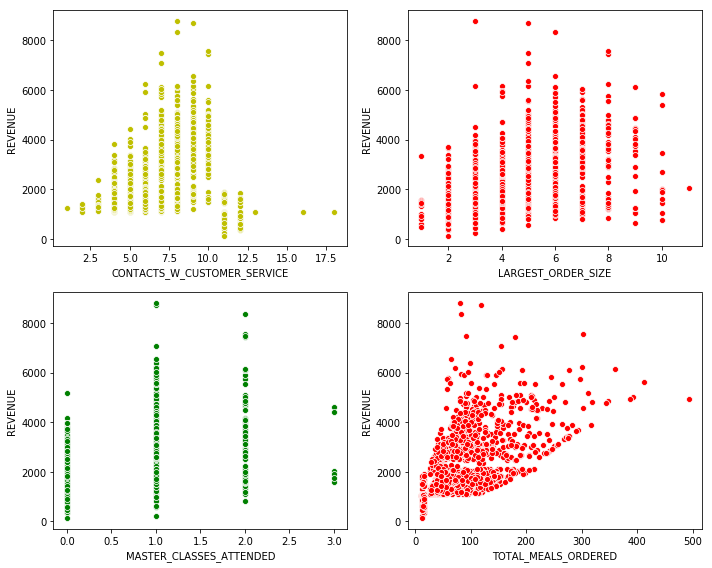

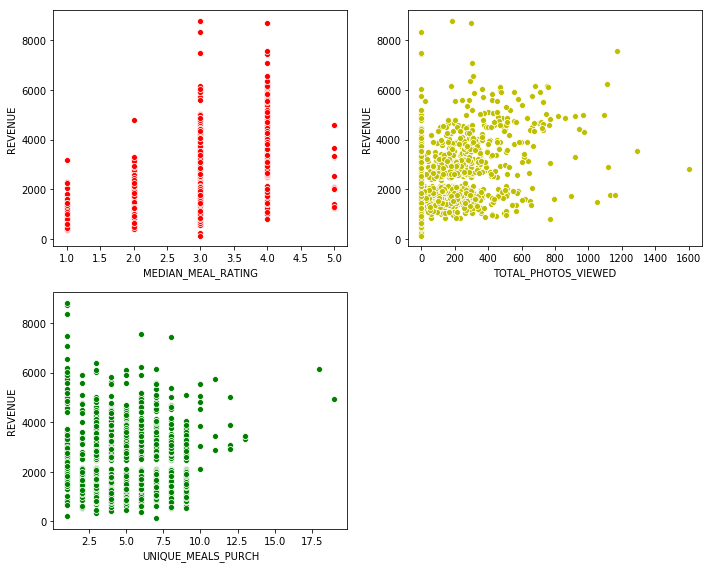

In [11]:
# create a scatter plot comparing with REVENUE
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice['REVENUE'],
                color = 'y',)
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['MASTER_CLASSES_ATTENDED'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_MEALS_ORDERED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['MEDIAN_MEAL_RATING'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['UNIQUE_MEALS_PURCH'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')


plt.tight_layout()
plt.show()

<strong> Flag the trend change </strong>

We can see there some data do not have a linear trend with REVENUE. We should treat them separately.<br>

<u>CONTACTS_W_CUSTOMER_SERVICE</u>: There is a big drop of trend after 8.<br>
<u>LARGEST_ORDER_SIZE_change</u>: The trend changes from increase to decrease after 9.<br>
<u>MASTER_CLASSES_ATTENDED</u>: The trend changes from increase to decrease after 2.<br> 
<u>TOTAL_MEALS_ORDERED</u>:  There is a spread in revenue when meals ordered is lower than 20.<br>
<u>MEDIAN_MEAL_RATING_</u>: There is a spread in revenue when median meal rating is at 4.<br>
<u>TOTAL_PHOTOS_VIEWED</u>: There is a spread in revenue when the total photo view is at 0<br>
<u>UNIQUE_MEALS_PURCH</u>: There is a spread in revenue when unique meal purchase is at 1<br>

Create new columns by flagging the outliers in each variables


In [12]:
# Set the points where there is a trend change when comparing by revenue
CONTACTS_W_CUSTOMER_SERVICE_change_hi = 8
LARGEST_ORDER_SIZE_change_hi          = 9
MASTER_CLASSES_ATTENDED_change_hi     = 2

TOTAL_MEALS_ORDERED_change_lo         = 20

MEDIAN_MEAL_RATING_change_at          = 4
TOTAL_PHOTOS_VIEWED_change_at         = 0
UNIQUE_MEALS_PURCH_change_at          = 1


# Create a list columns that have a trend change above a threshold
column_lst = [['CONTACTS_W_CUSTOMER_SERVICE', CONTACTS_W_CUSTOMER_SERVICE_change_hi],
              ['LARGEST_ORDER_SIZE', LARGEST_ORDER_SIZE_change_hi],
              ['MASTER_CLASSES_ATTENDED', MASTER_CLASSES_ATTENDED_change_hi]]

# Create new columns with the flagged data by using for loop
for col, hi in column_lst:
    
    apprentice['change_hi_' + col] = 0
    
    condition = apprentice.loc[0:,'change_hi_' + col][apprentice[col] > hi]

    apprentice['change_hi_' + col].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)
    

# Create a list columns that have a trend change lower a threshold
column_lst = [['TOTAL_MEALS_ORDERED', TOTAL_MEALS_ORDERED_change_lo]]

# Create new columns with the flagged data by using for loop
for col, lo in column_lst:
    
    apprentice['change_lo_' + col] = 0
    
    condition = apprentice.loc[0:,'change_lo_' + col][apprentice[col] < lo]

    apprentice['change_lo_' + col].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)
    
    
    
# Create a list of columns that have a trend change lower at a certain point
column_lst = [['MEDIAN_MEAL_RATING', MEDIAN_MEAL_RATING_change_at],
              ['TOTAL_PHOTOS_VIEWED', TOTAL_PHOTOS_VIEWED_change_at],
              ['UNIQUE_MEALS_PURCH', UNIQUE_MEALS_PURCH_change_at]]

# Create new columns with the flagged data by using for loop
for col, at in column_lst:
    
    apprentice['change_at_' + col] = 0
    
    condition = apprentice.loc[0:,'change_at_' + col][apprentice[col] == at]

    apprentice['change_at_' + col].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)

<h2> Feature Engineering</h2>

Create new following columns
1. contact_cs_per_order : To see how many times a customer contact with customer service per order.
2. med_rating_per_sec: To see the relationship between the meal rating that a customer gave and the visit time in our platform.
3. video_prep_time_per_click: To see the how many second that they watch instructional videos for meal preparation per click in our site.
4. cat_view_per_click: To see how many categories a customer view per click in our site.
5. largest_order_size_per_video_prep_sec: To see how many meals they ordered per every seconds that they watch the meals preparation video.

In [13]:
# Create new variables
apprentice['contact_cs_per_order'] = apprentice['CONTACTS_W_CUSTOMER_SERVICE']/apprentice['TOTAL_MEALS_ORDERED']
apprentice['med_rating_per_sec'] = apprentice['MEDIAN_MEAL_RATING']/apprentice['AVG_TIME_PER_SITE_VISIT']
apprentice['video_prep_time_per_click'] = apprentice['AVG_PREP_VID_TIME']/apprentice['AVG_CLICKS_PER_VISIT']   
apprentice['cat_view_per_click'] = apprentice['PRODUCT_CATEGORIES_VIEWED']/apprentice['AVG_CLICKS_PER_VISIT']
apprentice['largest_order_size_per_video_prep_sec'] = apprentice['LARGEST_ORDER_SIZE']/apprentice['AVG_PREP_VID_TIME']



<strong>Apply Natural Logarithm</strong>

Some variables are skewed and not normally distribute. We can apply natural logarithm in variables to make it more normal distributed and to scale it.

In [14]:
# Apply natural logarithm to the variables to make it normal distributed
apprentice['log_REVENUE'] = np.log(apprentice['REVENUE'])
apprentice['contact_cs_per_order'] = np.log(apprentice['contact_cs_per_order']+1)
apprentice['med_rating_per_sec'] = np.log(apprentice['med_rating_per_sec']+1)
apprentice['video_prep_time_per_click'] = np.log(apprentice['video_prep_time_per_click']+1)
apprentice['cat_view_per_click'] = np.log(apprentice['cat_view_per_click']+1)
apprentice['largest_order_size_per_video_prep_sec'] = np.log(apprentice['largest_order_size_per_video_prep_sec']+1)




<strong>Categorical data</strong>

The marketing team decided to separate emails of customers into categories (personal, professional, and junk).<br>After I tested the p-value, I decided not to use it because every categories contain a high p-value.


In [15]:
# # Create dummies variables for categorical data and then drop the original columns

# # make a list of the domain name of each category
# professional_email_domains = ['@mmm.com',
#                               '@amex.com',
#                               '@apple.com',
#                               '@boeing.com',
#                               '@caterpillar.com',
#                               '@chevron.com',
#                               '@cisco.com',
#                               '@cocacola.com',
#                               '@disney.com',
#                               '@dupont.com',
#                               '@exxon.com',
#                               '@ge.org',
#                               '@goldmansacs.com',
#                               '@homedepot.com',
#                               '@ibm.com',
#                               '@intel.com',
#                               '@jnj.com',
#                               '@jpmorgan.com',
#                               '@mcdonalds.com',
#                               '@merck.com',
#                               '@microsoft.com',
#                               '@nike.com',
#                               '@pfizer.com',
#                               '@pg.com',
#                               '@travelers.com',
#                               '@unitedtech.com',
#                               '@unitedhealth.com',
#                               '@verizon.com',
#                               '@visa.com',
#                               '@walmart.com']

# personal_email_domains  = ['@gmail.com',
#                            '@yahoo.com',
#                            '@protonmail.com']


# junk_email_domains  = ['@me.com',
#                        '@aol.com',
#                        '@hotmail.com',
#                        '@live.com',
#                        '@msn.com',
#                        '@passport.com']



# # create a list to record the information
# placeholder_lst = []


# # looping to group observations by domain type
# for domain in email_df[1]:
#         if '@' + domain in professional_email_domains:
#             placeholder_lst.append('professional')
            
#         elif '@' + domain in personal_email_domains:
#             placeholder_lst.append('personal')
        
#         elif '@' + domain in junk_email_domains:
#             placeholder_lst.append('junk') 
            
#         else:
#             print('unknown')

# # concatenating with original DataFrame
# apprentice['domain_group'] = pd.Series(placeholder_lst)


# # checking results
# apprentice['domain_group'].value_counts()

<strong> Correlation </strong><br><br>
Let's look at the correlation of variables with REVENUE.<br><br>
1. The variable that has the strongest correlation is video_prep_time_per_click. Insight that we can get from it maybe customer that visit our website just to watch meals preparation videos will give us more revenue comparing to the customers that visit our our website to look at the pictures or see our products.<br><br>

2. The variable that has the second strongest correlation is AVG_PREP_VID_TIME. This reinforce the previous insight that the time customers spend to watch our videos, the more revenue we can get from them.



In [16]:
# find the correlation in this dataset
df_corr = apprentice.corr().round(2)
df_corr

# show the correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                                  1.00
log_REVENUE                              0.95
video_prep_time_per_click                0.70
AVG_PREP_VID_TIME                        0.64
MEDIAN_MEAL_RATING                       0.61
TOTAL_MEALS_ORDERED                      0.60
change_at_MEDIAN_MEAL_RATING             0.59
TOTAL_PHOTOS_VIEWED                      0.47
MASTER_CLASSES_ATTENDED                  0.45
LARGEST_ORDER_SIZE                       0.43
change_at_UNIQUE_MEALS_PURCH             0.21
cat_view_per_click                       0.19
out_hi_TOTAL_MEALS_ORDERED               0.16
AVG_TIME_PER_SITE_VISIT                  0.14
med_rating_per_sec                       0.13
out_hi_AVG_PREP_VID_TIME                 0.12
CONTACTS_W_CUSTOMER_SERVICE              0.10
change_hi_CONTACTS_W_CUSTOMER_SERVICE    0.06
out_hi_MEDIAN_MEAL_RATING                0.04
out_hi_WEEKLY_PLAN                       0.03
PRODUCT_CATEGORIES_VIEWED                0.03
MOBILE_NUMBER                     

<strong>Prepare the data for the model</strong>

Group the RHS variables together, and select the log_REVENUE as a target variable.<br>
Then, do the train/test split and concatenate variables into train and test datasets

In [17]:
# preparing RHS variables
apprentice_data   = apprentice.drop(['REVENUE',
                                     'log_REVENUE'],
                                       axis = 1)


# preparing response variable
apprentice_target = apprentice.loc[:, ['log_REVENUE']]


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size = 0.25,
                                                    random_state = 222)

# concatinate RHS variables and target variable in to train and test data set
apprentice_train = pd.concat([X_train, y_train], axis = 1)
apprentice_test  = pd.concat([X_test, y_test], axis = 1)



<h2> Variable selection </h2>

Use OLS from statsmodels to do the linear regression analysis by putting all variables to predict 'log_REVENUE'.<br>
Then, drop the variables with high p-value one by one.<br><br>

I ended up with 28 variables with low p-value and gave me R2 of 0.837 for the train data. These are the variables that I will put it in each model to compare.


In [18]:
# set the LHS and RHS variables for linear regression
lr_reg  = smf.ols(formula = """log_REVENUE ~ apprentice_train['TOTAL_MEALS_ORDERED'] +
                                             apprentice_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                             apprentice_train['PRODUCT_CATEGORIES_VIEWED'] +
                                             apprentice_train['CANCELLATIONS_AFTER_NOON'] +
                                             apprentice_train['WEEKLY_PLAN'] +
                                             apprentice_train['EARLY_DELIVERIES'] +
                                             apprentice_train['AVG_PREP_VID_TIME'] +
                                             apprentice_train['LARGEST_ORDER_SIZE'] +
                                             apprentice_train['MASTER_CLASSES_ATTENDED'] +
                                             apprentice_train['MEDIAN_MEAL_RATING'] +
                                             apprentice_train['out_hi_TOTAL_MEALS_ORDERED'] +
                                             apprentice_train['out_hi_CONTACTS_W_CUSTOMER_SERVICE'] +
                                             apprentice_train['out_hi_CANCELLATIONS_AFTER_NOON'] +
                                             apprentice_train['out_hi_WEEKLY_PLAN'] +
                                             apprentice_train['out_hi_AVG_PREP_VID_TIME'] +
                                             apprentice_train['out_hi_MEDIAN_MEAL_RATING'] +
                                             apprentice_train['change_hi_CONTACTS_W_CUSTOMER_SERVICE'] +
                                             apprentice_train['change_hi_LARGEST_ORDER_SIZE'] +
                                             apprentice_train['change_hi_MASTER_CLASSES_ATTENDED'] +
                                             apprentice_train['change_lo_TOTAL_MEALS_ORDERED'] +
                                             apprentice_train['change_at_MEDIAN_MEAL_RATING'] +
                                             apprentice_train['change_at_TOTAL_PHOTOS_VIEWED'] +
                                             apprentice_train['change_at_UNIQUE_MEALS_PURCH'] +
                                             apprentice_train['contact_cs_per_order'] +
                                             apprentice_train['med_rating_per_sec'] +
                                             apprentice_train['video_prep_time_per_click'] +
                                             apprentice_train['cat_view_per_click'] +
                                             apprentice_train['largest_order_size_per_video_prep_sec'] 
                                             """,
                                             data = apprentice_train)


# fit the model
results = lr_reg.fit()


# printing the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:31:20   Log-Likelihood:                 330.61
No. Observations:                1459   AIC:                            -603.2
Df Residuals:                    1430   BIC:                            -449.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     5.9401      0.142     41.912      0.000       5.662       6.218
apprentice_train['TOTAL_MEALS_ORDERED']                       0.0011      0.000      5.279      0.000       0.001       0.001
apprentice_train['CONTACTS_W_CUSTOMER_SERVICE']               0.0610      0.005     11.251      0.000       0.050       0.072
apprentice_train['PRODUCT_CATEGORIES_VIEWED']                 0.0350      0.010      3.343      0.001       0.014       0.056
apprentice_train['CANCELLATIONS_AFTER_NOON']                 -0.0381      0.016     -2.415      0.016      -0.069      -0.007
apprentice_train['WEEKLY_PLAN']                              -0.0017      0.001     -2.243      0.025      -0.003      -0.000
apprentice_train['EARLY_DELIVERIES']                         -0.0047      0.002     -2.078      0.038      -0.009      -0.000
apprentice_train['AVG_PREP_VID_TIME']                         0.0032      0.001      5.168      0.000       0.002       0.004
apprentice_train['LARGEST_ORDER_SIZE']                       -0.0739      0.019     -3.804      0.000      -0.112      -0.036
apprentice_train['MASTER_CLASSES_ATTENDED']                   0.0536      0.010      5.588      0.000       0.035       0.072
apprentice_train['MEDIAN_MEAL_RATING']                        0.0960      0.015      6.531      0.000       0.067       0.125
apprentice_train['out_hi_TOTAL_MEALS_ORDERED']               -0.3228      0.089     -3.635      0.000      -0.497      -0.149
apprentice_train['out_hi_CONTACTS_W_CUSTOMER_SERVICE']       -0.9268      0.206     -4.493      0.000      -1.331      -0.522
apprentice_train['out_hi_CANCELLATIONS_AFTER_NOON']           0.1090      0.047      2.335      0.020       0.017       0.200
apprentice_train['out_hi_WEEKLY_PLAN']                        0.0559      0.026      2.115      0.035       0.004       0.108
apprentice_train['out_hi_AVG_PREP_VID_TIME']                 -0.6795      0.147     -4.635      0.000      -0.967      -0.392
apprentice_train['out_hi_MEDIAN_MEAL_RATING']                -0.1696      0.073     -2.316      0.021      -0.313      -0.026
apprentice_train['change_hi_CONTACTS_W_CUSTOMER_SERVICE']     0.0537      0.023      2.363      0.018       0.009       0.098
apprentice_train['change_hi_LARGEST_ORDER_SIZE']             -0.1695      0.069     -2.440      0.015      -0.306      -0.033
apprentice_train['change_hi_MASTER_CLASSES_ATTENDED']        -0.2344      0.094     -2.503      0.012      -0.418      -0.051
apprentice_train['change_lo_TOTAL_MEALS_ORDERED']             0.6581      0.201      3.275      0.001       0.264       1.052
apprentice_train['change_at_MEDIAN_MEAL_RATING']           



<strong>Export the file to put in the model</strong>


In [19]:
# export file to 'apprentice_featured.xlsx'
apprentice.to_excel('apprentice_featured.xlsx',index = False)

<h2>Preparing the data for the models</h2><br><br>

I select the variables from the previous section and do the train test split again.



In [2]:
apprentice = pd.read_excel('apprentice_featured.xlsx')

In [3]:
x_variables_final = ['TOTAL_MEALS_ORDERED',
                     'CONTACTS_W_CUSTOMER_SERVICE',
                     'PRODUCT_CATEGORIES_VIEWED',
                     'CANCELLATIONS_AFTER_NOON',
                     'WEEKLY_PLAN',
                     'EARLY_DELIVERIES',
                     'AVG_PREP_VID_TIME',
                     'LARGEST_ORDER_SIZE',
                     'MASTER_CLASSES_ATTENDED',
                     'MEDIAN_MEAL_RATING',
                     'out_hi_TOTAL_MEALS_ORDERED',
                     'out_hi_CONTACTS_W_CUSTOMER_SERVICE',
                     'out_hi_CANCELLATIONS_AFTER_NOON',
                     'out_hi_WEEKLY_PLAN',
                     'out_hi_AVG_PREP_VID_TIME',
                     'out_hi_MEDIAN_MEAL_RATING',
                     'change_hi_CONTACTS_W_CUSTOMER_SERVICE',
                     'change_hi_LARGEST_ORDER_SIZE',
                     'change_hi_MASTER_CLASSES_ATTENDED',
                     'change_lo_TOTAL_MEALS_ORDERED',
                     'change_at_MEDIAN_MEAL_RATING',
                     'change_at_TOTAL_PHOTOS_VIEWED',
                     'change_at_UNIQUE_MEALS_PURCH',
                     'contact_cs_per_order',
                     'med_rating_per_sec',
                     'video_prep_time_per_click',
                     'cat_view_per_click',
                     'largest_order_size_per_video_prep_sec'] 

In [4]:
# preparing RHS variables
apprentice_data = apprentice.loc[:, x_variables_final]


# preparing response variable
apprentice_target = apprentice.loc[:, 'log_REVENUE']


# running train/test split
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size = 0.25,
                                                    random_state = 222)


<strong>Model Comparing</strong><br><br>

I put the selected variables from the previous section and put it in each model to see which one are the best.<br><br>
I commented it and show only the final model. You can see what are the score of each model by uncomment it.

In [ ]:
# models = [['Linear', LinearRegression()],
#           ['Ridge', Ridge()],
#           ['XGBoost', xgb.XGBRegressor()]]

# model_name = []
# train_score = []
# test_score = []


# for name, model in models:
#     # FITTING to the training data
#     model_fit = model.fit(X_train, y_train)


#     # PREDICTING on new data
#     model_pred = model_fit.predict(X_test)

#     # SCORING the results
#     model_name.append(name)
#     train_score.append(model.score(X_train, y_train).round(4))
#     test_score.append(model.score(X_test, y_test).round(4))

# model_compare = pd.DataFrame({'model': model_name,
#                               'train_score': train_score,
#                               'test_score': test_score})

# model_compare

<h2>Final Model</h2><br><br>

The XGBRegressor model gave me the best result.<br>
I adjusted some hyperparameters to increase the performance and to prevent the overfitting.

- learning_rate: 0.14 (default = 0.3) to make the boosting process more conservative.
- max_depth: 4 (default = 6) to make the model less complex and make it less overfit.

In [7]:
model = xgb.XGBRegressor(silent= 1,
                         learning_rate = 0.14,
                         max_depth= 4)

# fit the model
model.fit(X_train, y_train)


/Users/Piya/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.14, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1, verbosity=1)

<strong>R2 from the model</strong><br><br>

I use cross_val_score() to do the 5 fold cross-validation to measure the R2 in each fold and then average it to get the final R2. This help reduce the chance of overfitting.<br><br>

The R2 for Training dataset is 0.823 <br>
The R2 for training dataset is 0.815 <br>

In [8]:
# measure R2 of train data by using cross validation method
train_score = cross_val_score(model,
                              X_train,
                              y_train,
                              scoring='r2',
                              cv=5,
                              n_jobs=-1) 

# measure R2 of test data by using cross validation method
test_score  = cross_val_score(model,
                              X_test,
                              y_test,
                              scoring='r2',
                              cv=5,
                              n_jobs=-1)

# Show the result
print('score for training data set: ' + str(round(train_score.mean(),3)))
print('score for testing data set : ' + str(round(test_score.mean(),3)))

score for training data set: 0.823
score for testing data set : 0.815


<strong>Feature Importance</strong><br><br>

We can see what are the variables that is the most important in the model.

In [9]:
##Investingating which features are most 


feature = []
coef_model = []

for feat, importance_model in zip(x_variables_final, model.feature_importances_):
    feature.append(feat)
    coef_model.append(importance_model)
    
feature_df = pd.DataFrame ({'Feature'          : feature,
                           'Feature Importance': coef_model})

feature_df = feature_df.sort_values('Feature Importance', ascending=False)

feature_df

,Feature,Feature Importance
9,MEDIAN_MEAL_RATING,0.180472
25,video_prep_time_per_click,0.144136
8,MASTER_CLASSES_ATTENDED,0.137641
20,change_at_MEDIAN_MEAL_RATING,0.132277
22,change_at_UNIQUE_MEALS_PURCH,0.126239
0,TOTAL_MEALS_ORDERED,0.070451
1,CONTACTS_W_CUSTOMER_SERVICE,0.047007
23,contact_cs_per_order,0.043571
21,change_at_TOTAL_PHOTOS_VIEWED,0.033376
6,AVG_PREP_VID_TIME,0.019603
